In [1]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data
df= pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# Drop ID column
df = df.drop(columns=["Unnamed: 0", 'id'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [256]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [257]:
# Drop null value
df = df.dropna()

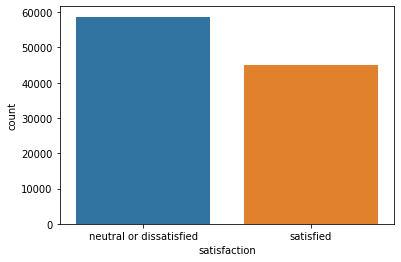

In [258]:
ax = sns.countplot(x="satisfaction", data=df)

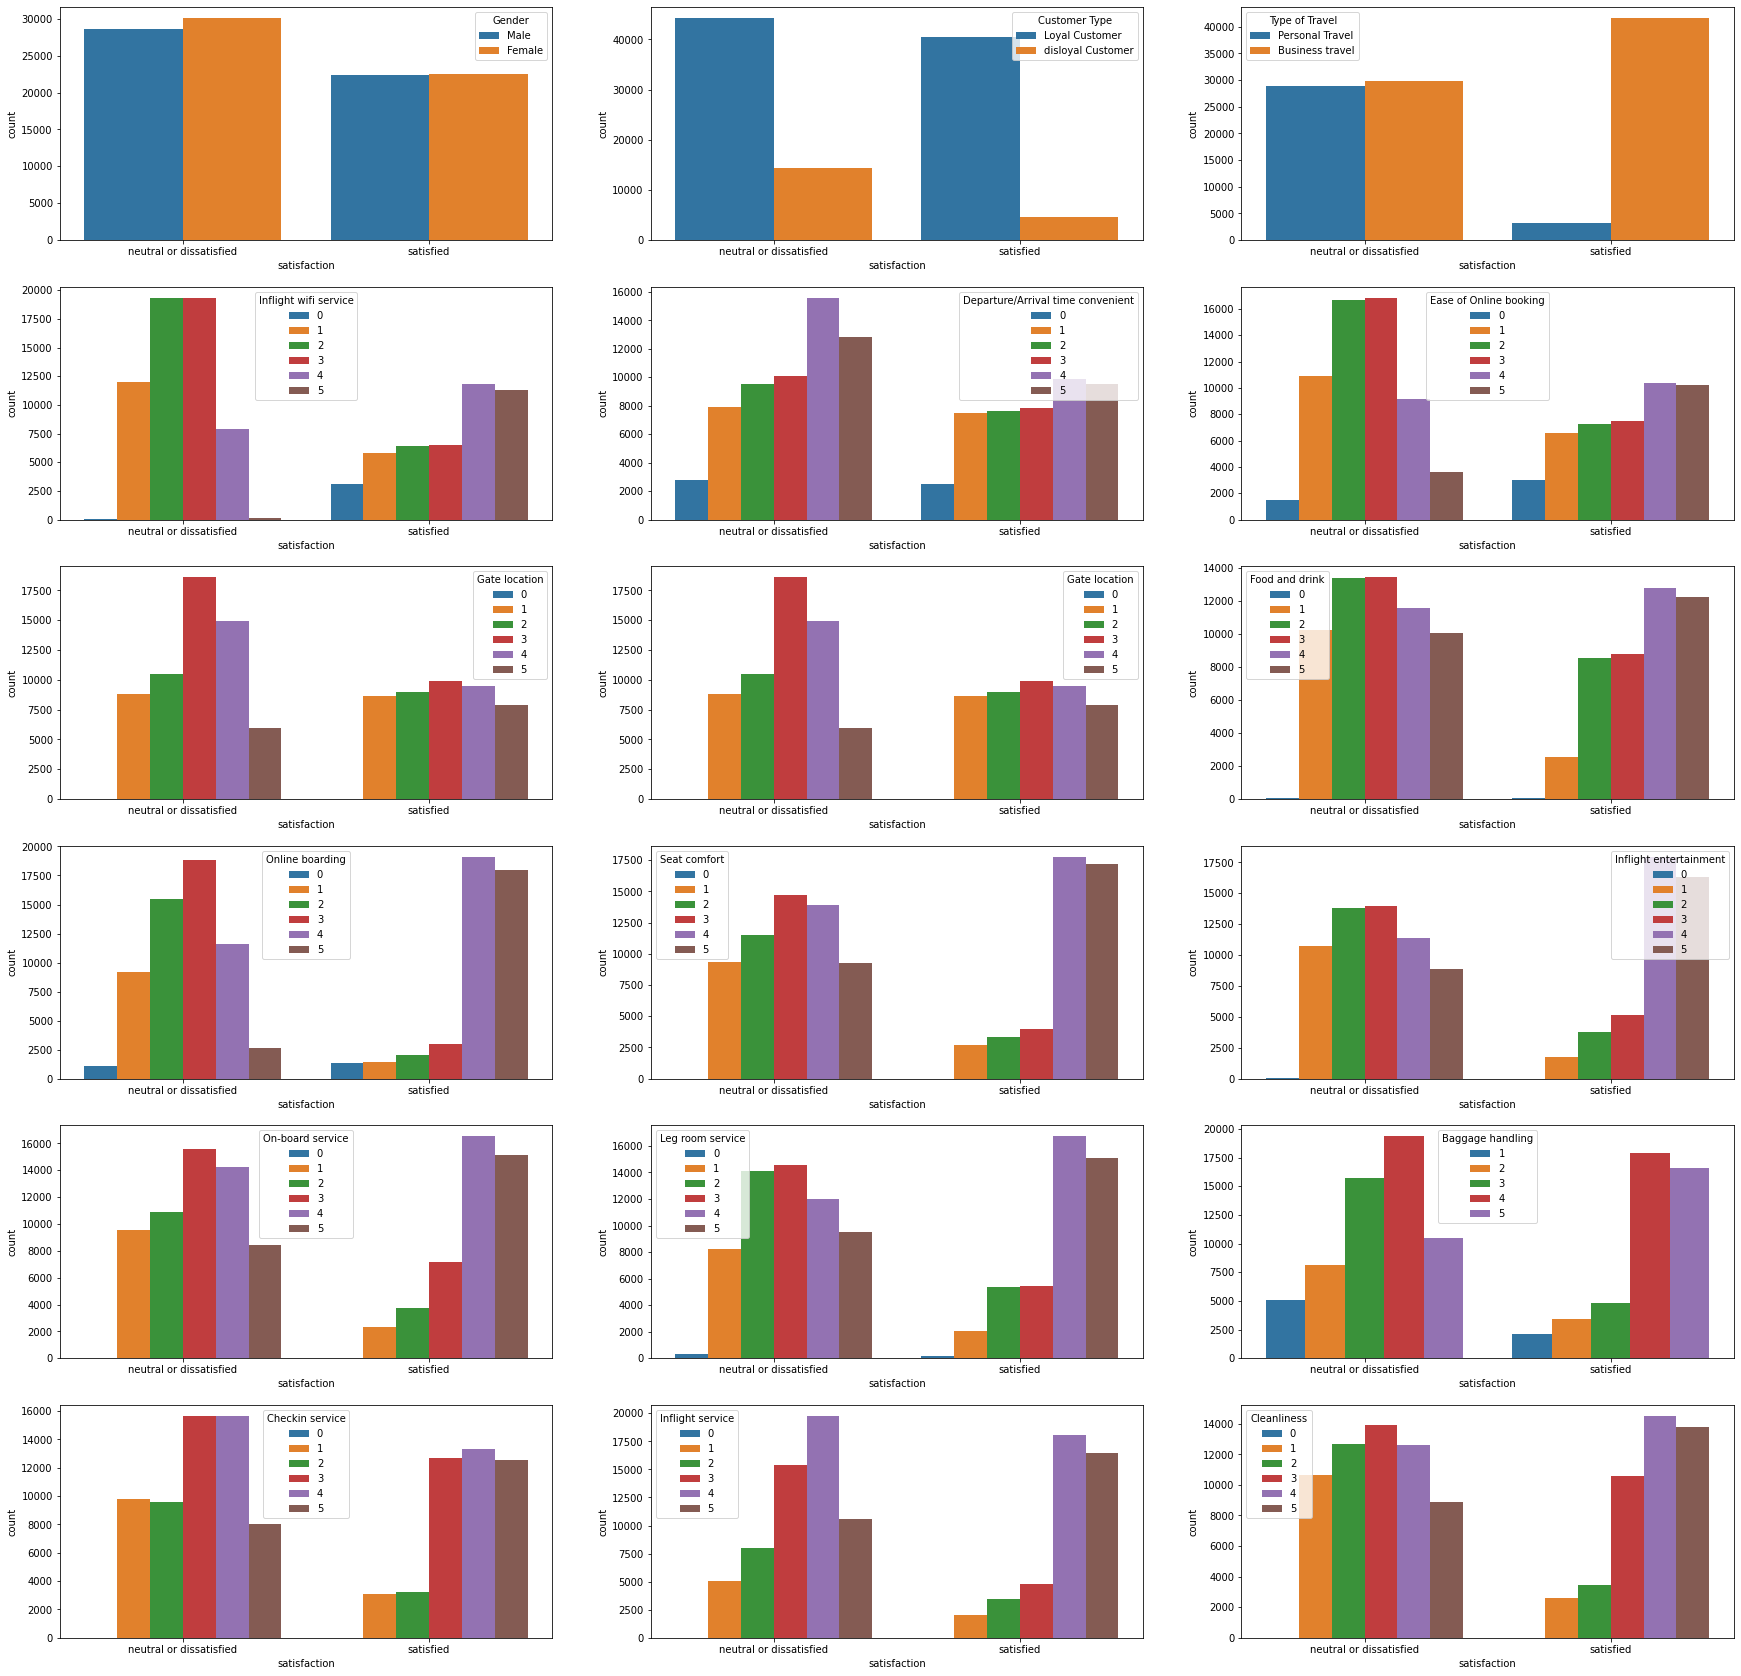

In [259]:
# Visualise the countplot for categorical and ordinal valuable against satisfaction
columns = ['Gender','Customer Type','Type of Travel','Inflight wifi service','Departure/Arrival time convenient',
           'Ease of Online booking','Gate location','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment'
          ,'On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']

count = 1
plt.subplots(figsize=(30, 30))
for i in columns:
    plt.subplot(6,3,count)
    ax = sns.countplot(x="satisfaction", data=df, hue=i)
    count +=1

In [260]:
# Describe basic statistics for numerical variable
df[["Flight Distance",'Departure Delay in Minutes','Arrival Delay in Minutes']].describe()

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000
mean,1189.325202,14.747939,15.178678
std,997.297235,38.116737,38.698682
min,31.000000,0.000000,0.000000
25%,414.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000
75%,1743.000000,12.000000,13.000000
max,4983.000000,1592.000000,1584.000000


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

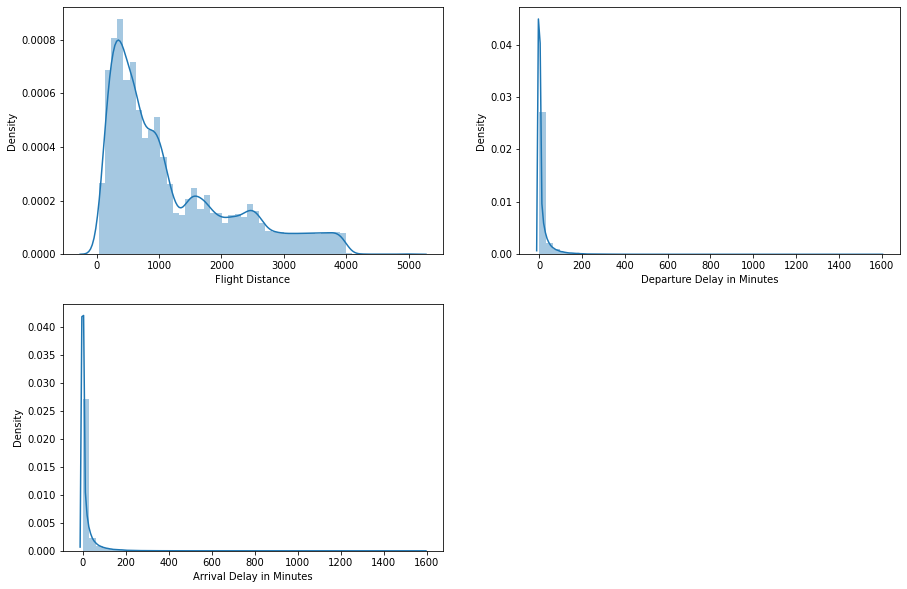

In [261]:
# Visualise numerical variable
columns = ['Flight Distance',"Departure Delay in Minutes",'Arrival Delay in Minutes']

count = 1
plt.subplots(figsize=(15,10))
for i in columns:
    plt.subplot(2,2,count)
    sns.distplot(df[i])
    count +=1

In [262]:
# Feature engineering for categorical variable to ordinal variable
df["Gender"] = df['Gender'].apply(lambda x:0 if x=='Male' else 1)
df["Customer Type"] = df['Customer Type'].apply(lambda x:0 if x=='disloyal Customer' else 1)
df["Type of Travel"] = df['Type of Travel'].apply(lambda x:0 if x=='Personal Travel' else 1)
df['Class'] = df["Class"].apply(lambda x:0 if x=='Eco' else (1 if x=='Eco Plus' else 2))
df["satisfaction"] = df['satisfaction'].apply(lambda x:0 if x=='neutral or dissatisfied' else 1)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


<AxesSubplot:>

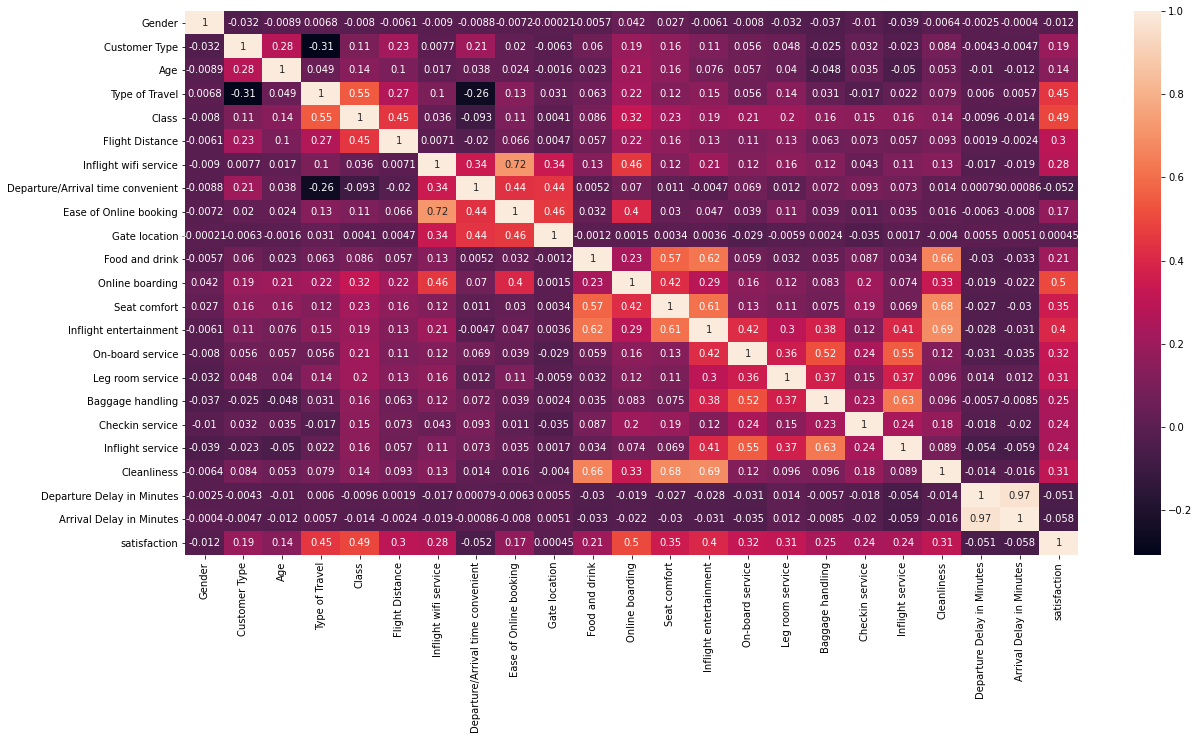

In [263]:
# Visualise Correlation Matrix
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.corr(), ax=ax, annot=True)

In [264]:
# Only Extraxt the feature which are seem to be influentioal (Thresfold is more than 0.3)
top_correlations = df.corr()
top_feature_columns = top_correlations['satisfaction'][top_correlations['satisfaction'].values > 0.3].index.values
top_feature_columns

array(['Type of Travel', 'Class', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Cleanliness', 'satisfaction'], dtype=object)

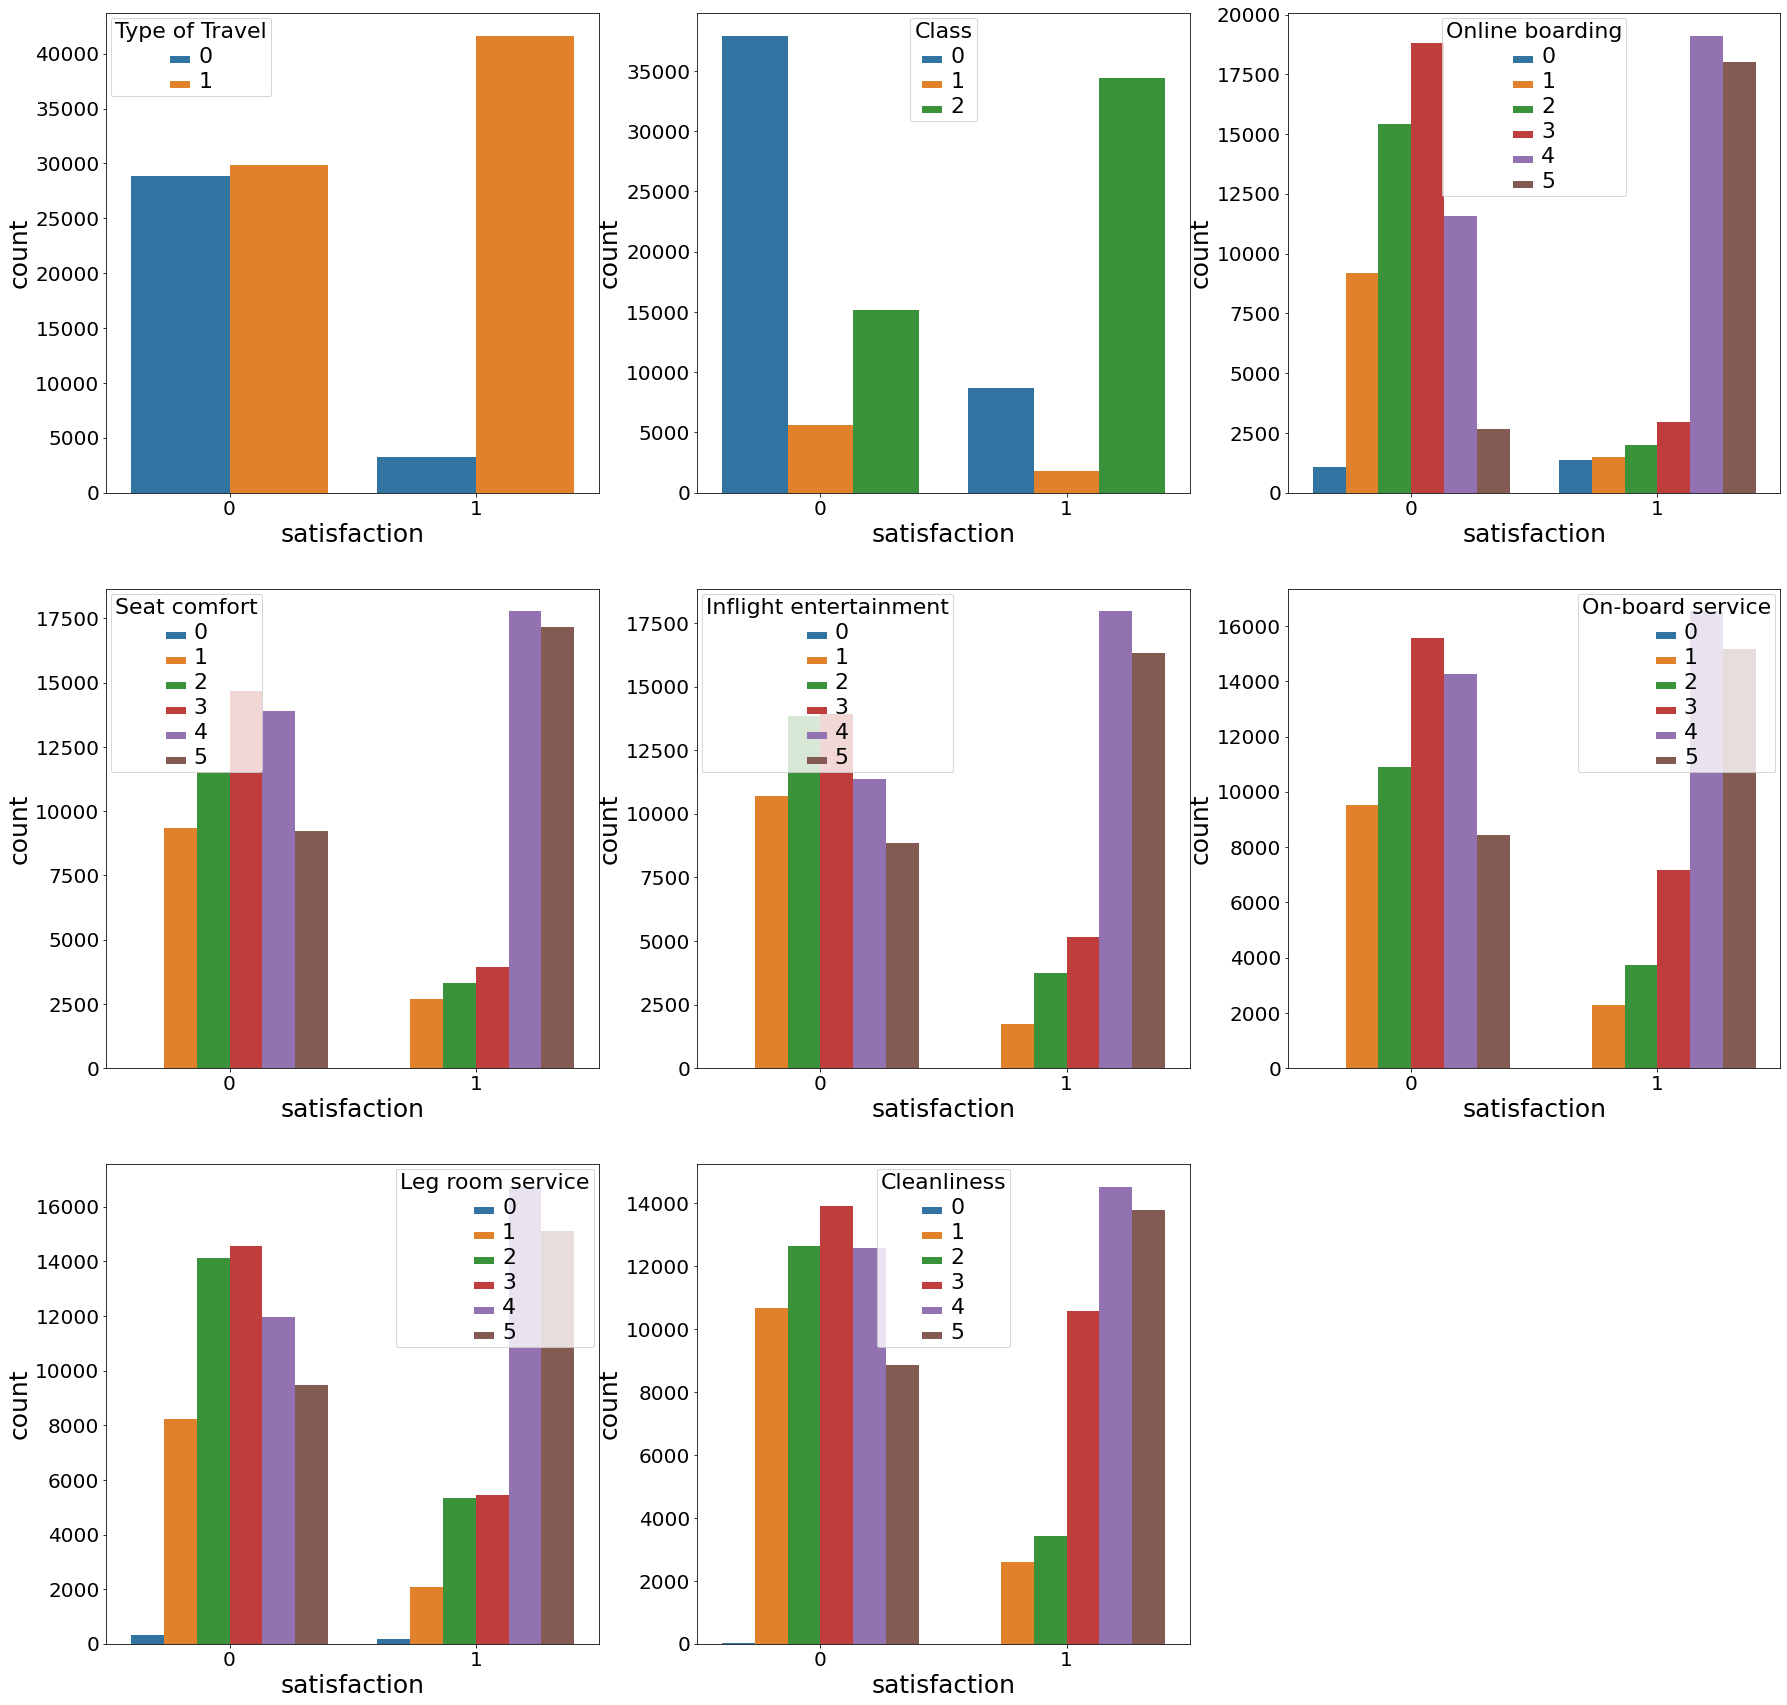

In [265]:
# Create the countplot only for highly correlated variable
count = 1
plt.subplots(figsize=(30, 30))
with plt.style.context({'axes.labelsize':25,
                        'xtick.labelsize':20,
                        'ytick.labelsize':20}): 
    for i in top_feature_columns[:-1]:
        plt.subplot(3,3,count)
        ax = sns.countplot(x="satisfaction", data=df, hue=i)
        plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
        plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
        count +=1

<Figure size 432x288 with 0 Axes>

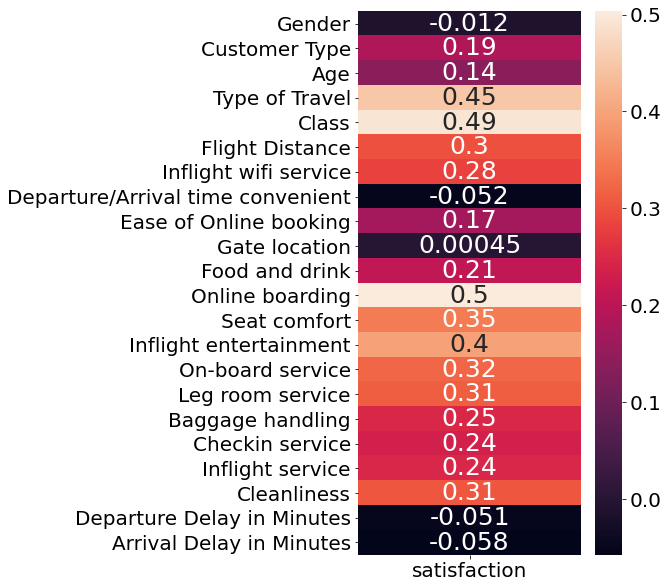

In [266]:
# Visualise Correlation Matrix only against satisfaction
plt.figure()
with plt.style.context({'axes.labelsize':45,
                        'xtick.labelsize':20,
                        'ytick.labelsize':20}):    
    df_satisfaction_corr = df.corr()['satisfaction'][:-1]
    fig, ax = plt.subplots(figsize=(5,10)) 
    sns.heatmap(df_satisfaction_corr.to_frame(),annot=True, annot_kws={'size':25})
    plt.show();

In [267]:
# Load test data and done the feature encoding in the same way
test = pd.read_csv('test.csv')
test["Gender"] = test['Gender'].apply(lambda x:0 if x=='Male' else 1)
test["Customer Type"] = test['Customer Type'].apply(lambda x:0 if x=='disloyal Customer' else 1)
test["Type of Travel"] = test['Type of Travel'].apply(lambda x:0 if x=='Personal Travel' else 1)
test['Class'] = test["Class"].apply(lambda x:0 if x=='Eco' else (1 if x=='Eco Plus' else 2))
test["satisfaction"] = test['satisfaction'].apply(lambda x:0 if x=='neutral or dissatisfied' else 1)
test = test.drop(columns=["Unnamed: 0", 'id'])
test = test.dropna()
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [268]:
# Update new dataset to be trainable in machine learning model
df.to_csv("airline_train.csv")
test.to_csv("airline_test.csv")